In [4]:
from __future__ import print_function
import math
import time
import copy
import json
import os
from os import listdir
from os.path import isfile, join
from random import random
from io import BytesIO
from enum import Enum
from functools import partial
import PIL.Image
from IPython.display import clear_output, Image, display, HTML
import numpy as np
import scipy.misc
import cv2
import tensorflow as tf


from io import BytesIO
import PIL.Image



def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 1)*255)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))


In [8]:
import sklearn.cluster

pixels = img

z=[]
for i in range(100):
    for j in range(100):
        p2=img[i,j,:]
        zz = random()
        if zz < 0.33:
            p = [100+5*random(), 200+5*random(), 50+5*random()]
        elif zz < 0.67:
            p = [220+5*random(), 40+5*random(), 30+5*random()]
        else:
            p = [60+5*random(), 140+5*random(), 190+5*random()]
        z.append(p2)
#n_clusters=3
z = np.array(z)

In [2]:
n_clusters = 4

h, w = 300, 300


img = scipy.misc.imread('media/monalisa.jpg', mode='RGB')
img = scipy.misc.imresize(img, (h, w))
ih, iw, ic = img.shape
pixels = np.array(list(img)).reshape(ih * iw, ic)
clusters, assign, _ = sklearn.cluster.k_means(pixels, n_clusters, init='k-means++')
new_pixels = np.array([clusters[a] for a in assign]).reshape((ih, iw, ic))

showarray(new_pixels/255.)

NameError: name 'sklearn' is not defined

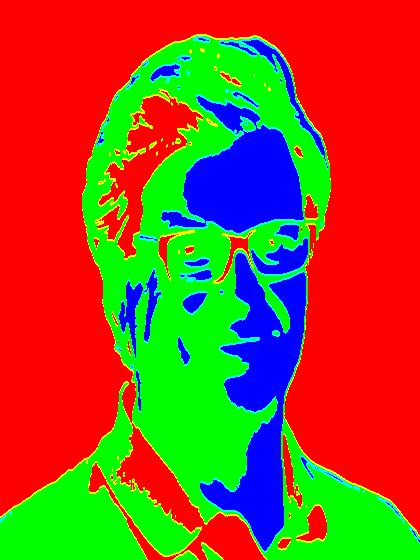

In [601]:
def mask_image_kmeans2(h, w, n, path, blur_k, n_dilations):
    img = cv2.imread(path)
    img = cv2.blur(img, (blur_k, blur_k))
    for d in range(n_dilations):
        img = cv2.dilate(img, (2, 2))    
    img = cv2.resize(img, (w, h), cv2.INTER_LINEAR)   # CHANGE
    ih, iw, ic = img.shape
    pixels = np.array(list(img)).reshape(ih * iw, ic)
    clusters, assign, _ = sklearn.cluster.k_means(pixels, n, init='k-means++')
    clusters = [[c[2],c[1],c[0]] for c  in clusters]
    #new_pixels = np.array([clusters[a] for a in assign]).reshape((ih, iw, ic))
    #showarray(new_pixels/255.)
    assign = assign.reshape((ih, iw))
    mask = np.zeros((h, w, n))
    for c in range(n):
        mask[:,:,c] = np.multiply(np.ones((h,w)), assign==c)
    return mask, clusters


def mask_image_kmeans(h, w, n, path, blur_k, n_dilations, prev_assign=None):
    mask = np.zeros((h, w, n))
    img = cv2.imread(path)
    img = cv2.blur(img, (blur_k, blur_k))
    #img = crop_to_aspect_ratio(img, float(w)/h)
    img = cv2.resize(img, (w, h), cv2.INTER_NEAREST)   # CHANGE
    pixels = np.array(list(img)).reshape(h * w, ic)
    clusters, assign, _ = sklearn.cluster.k_means(pixels, n, init='k-means++')
    #clusters = [[c[2],c[1],c[0]] for c in clusters]
    #new_pixels = np.array([clusters[a] for a in assign]).reshape((ih, iw, ic))
    if prev_assign is not None:
        assign_candidates, best_total = list(itertools.permutations(range(n))), -1
        for ac in assign_candidates:
            #reorder = [ac.index(i) for i in range(n)]
            reassign = np.array([ac[a] for a in assign])
            total = np.sum(reassign == prev_assign)
            if total > best_total:
                best_total, best_assign = total, reassign
        assign = best_assign
    else:
        amts = [np.sum(assign==c) for c in range(n)]
        order = list(reversed(sorted(range(len(amts)), key=lambda k: amts[k])))
        reorder = [order.index(i) for i in range(n)]
        assign = np.array([reorder[a] for a in assign])
    for c in range(n):
        channel_mask = np.multiply(np.ones((h*w)), assign==c).reshape((h,w))
        for d in range(n_dilations):
            channel_mask = cv2.dilate(channel_mask, (3, 3))    
        #channel_mask = cv2.resize(channel_mask, (w, h), cv2.INTER_LINEAR)   # CHANGE
        mask[:,:,c] = channel_mask
    return mask, assign

#assign = None
mask, assign=mask_image_kmeans(560, 420, 3, 'media/yann-lecun.png', 20, 2, assign)
showarray(mask)
# print(assign)
# print(assign.shape)
# showarray(assign)



In [108]:
print(assign.shape)
z = (0,2,1)
k = [z[a] for a in assign]
print(k)

(201600,)
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [83]:
#print(prev_assign.shape)
#print(assign.shape)
n = 3

h, w = 560, 360
zzz, yyy = prev_assign, assign

assign_p = list(itertools.permutations(range(n)))
best_total, best_assign, idx_best = -1, None, 0
for ap in assign_p:
    reassign = np.array([ap[a] for a in np.array(list(assign)).reshape(h*w)]).reshape((h,w))
#    print(reassign)
#    print(reassign.shape)
#    print(prev_assign)
#    print(prev_assign.shape)
    total = np.sum(reassign == prev_assign)
#    print(ap, total)
    #total = sum([np.sum(np.multiply(assign==c, prev_assign==ap[c])) for c in range(n)])
    if total > best_total:
        print(ap)
        #idx_best, best_total = a, total
        #assign = reassign
        best_assign = reassign
        best_total = total


#print(best_total, best_assign)
        
# print(best_total, assign)

# #assign
# #print()
# c= [0, 1, 2]
# print(assign.shape)

# h, w = assign.shape

# reassign = np.array([c[a] for a in np.array(list(assign)).reshape(h*w)]).reshape((h*w))

# print(z.shape)
# print(assign)
# print("====")
# print(c)
# print(z)

(0, 1, 2)
(0, 2, 1)
(1, 0, 2)
(2, 0, 1)


In [109]:
channel_swatches=[]

channel_swatches.append('/home/gene/projects/lapnorm/results/canvas2/J1-114+J1-75+K1-42_n16_o04_r1.31/frame0002.png')
channel_swatches.append('/home/gene/projects/lapnorm/results/canvas2/J1-114+J1-75+K1-42_n16_o04_r1.31/frame0003.png')
channel_swatches.append('/home/gene/projects/lapnorm/results/canvas2/J1-114+J1-75+K1-42_n16_o04_r1.31/frame0004.png')
channel_swatches.append('/home/gene/projects/lapnorm/results/canvas2/J1-114+J1-75+K1-42_n16_o04_r1.31/frame0005.png')
channel_swatches.append('/home/gene/projects/lapnorm/results/canvas2/J1-114+J1-75+K1-42_n16_o04_r1.31/frame0006.png')
channel_swatches.append('/home/gene/projects/lapnorm/results/canvas2/J1-114+J1-75+K1-42_n16_o04_r1.31/frame0007.png')
channel_swatches.append('/home/gene/projects/lapnorm/results/canvas2/J1-114+J1-75+K1-42_n16_o04_r1.31/frame0008.png')
channel_swatches.append('/home/gene/projects/lapnorm/results/canvas2/J1-114+J1-75+K1-42_n16_o04_r1.31/frame0009.png')
channel_swatches.append('/home/gene/projects/lapnorm/results/canvas2/J1-114+J1-75+K1-42_n16_o04_r1.31/frame0010.png')
channel_swatches.append('/home/gene/projects/lapnorm/results/canvas2/J1-114+J1-75+K1-42_n16_o04_r1.31/frame0011.png')
channel_swatches.append('/home/gene/projects/lapnorm/results/canvas2/J1-114+J1-75+K1-42_n16_o04_r1.31/frame0012.png')

swatch_stats=[]
for swatch in channel_swatches:
    img = scipy.misc.imread(swatch, mode='RGB')
    ih, iw, ic = img.shape
    pixels = np.array(list(img)).reshape(ih * iw, ic)
    avg = np.average(pixels, axis=0)
    var = np.std(pixels, axis=0)
    var_mag = np.linalg.norm(var)
    swatch_stats.append({
        'layer':5, 'channel':8,
        'avg':avg, 'var':var, 'var_mag':var_mag
    })

print(swatch_stats)

[{'layer': 5, 'channel': 8, 'avg': array([ 116.21157552,   97.44957465,  101.94876736]), 'var': array([ 23.35726371,  22.8867335 ,  20.31956664]), 'var_mag': 38.49998865532045}, {'layer': 5, 'channel': 8, 'avg': array([ 109.79702691,   90.33536892,   95.77805122]), 'var': array([ 24.53387884,  24.00418144,  22.9736501 ]), 'var_mag': 41.302548786108638}, {'layer': 5, 'channel': 8, 'avg': array([ 116.12224826,   95.17982205,  103.44819878]), 'var': array([ 24.67504985,  25.023322  ,  23.25574934]), 'var_mag': 42.140889956661965}, {'layer': 5, 'channel': 8, 'avg': array([ 125.33030382,  106.25736111,  111.75698785]), 'var': array([ 24.96863494,  26.31107606,  23.35649908]), 'var_mag': 43.141992348942537}, {'layer': 5, 'channel': 8, 'avg': array([ 126.56540365,  106.07424479,  109.9412717 ]), 'var': array([ 26.09963319,  26.44107524,  24.24167816]), 'var_mag': 44.361923677243098}, {'layer': 5, 'channel': 8, 'avg': array([ 119.01192708,   98.91486545,  101.10487413]), 'var': array([ 25.8532